In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

Using CNTK backend


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

In [3]:
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test  = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
model = Sequential()
model.add(Dense(128, input_dim=input_unit_size, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(num_classes, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=2,  validation_split=0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
 - 2s - loss: 0.5219 - acc: 0.8538 - val_loss: 0.2531 - val_acc: 0.9291
Epoch 2/20
 - 2s - loss: 0.2591 - acc: 0.9251 - val_loss: 0.1738 - val_acc: 0.9504
Epoch 3/20
 - 2s - loss: 0.2006 - acc: 0.9425 - val_loss: 0.1408 - val_acc: 0.9614
Epoch 4/20
 - 2s - loss: 0.1677 - acc: 0.9518 - val_loss: 0.1277 - val_acc: 0.9643
Epoch 5/20
 - 2s - loss: 0.1437 - acc: 0.9584 - val_loss: 0.1128 - val_acc: 0.9666
Epoch 6/20
 - 2s - loss: 0.1253 - acc: 0.9630 - val_loss: 0.1067 - val_acc: 0.9701
Epoch 7/20
 - 2s - loss: 0.1158 - acc: 0.9661 - val_loss: 0.1020 - val_acc: 0.9699
Epoch 8/20
 - 2s - loss: 0.1028 - acc: 0.9697 - val_loss: 0.0897 - val_acc: 0.9744
Epoch 9/20
 - 2s - loss: 0.0959 - acc: 0.9719 - val_loss: 0.0893 - val_acc: 0.9741
Epoch 10/20
 - 2s - loss: 0.0889 - acc: 0.9735 - val_loss: 0.0843 - val_acc: 0.9748
Epoch 11/20
 - 2s - loss: 0.0832 - acc: 0.9757 - val_loss: 0.0808 - val_acc: 0.9767
Epoch 12/20
 - 2s - loss: 0.0781 - a

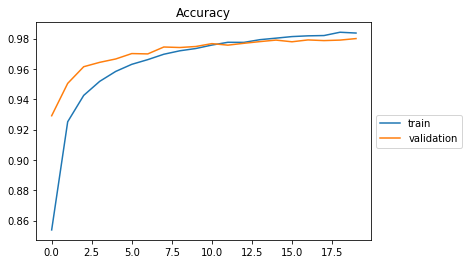

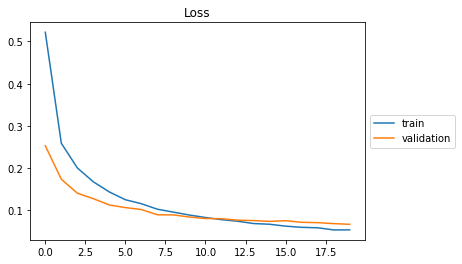

In [6]:
x = range(20)
plt.plot(x, result.history['acc'], label='train')
plt.plot(x, result.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label='train')
plt.plot(x, result.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))